In [1]:
'Baby presence detection with obstructions like Sunscreen and Blanket'

'Baby presence detection with obstructions like Sunscreen and Blanket'

In [3]:
import gc
gc.collect()

0

In [4]:
%reset -f

In [5]:
# Import every packages for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

# Add measurements for withoutbaby

In [10]:
import numpy as np
import pandas as pd
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
file_path = 'Carrierseat_withoutbaby_npy_array_Lowpassfiltered_label_0.npy'

# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withoutbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0
20996,-372.023810,2781.757042,1.300276,0.0
20997,-279.017857,3850.745335,-1.609702,0.0
20998,-186.011905,3807.554627,1.950552,0.0


In [11]:
num_rows_withoutbaby = len(dataframe_withoutbaby)
num_rows_withoutbaby

21000

In [12]:
fft_magnitudes_withoutbaby = dataframe_withoutbaby["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_withoutbaby

array([87853.61468622, 42906.08156416,  3807.5546275 , ...,
        3850.74533502,  3807.5546275 , 42906.08156416], shape=(21000,))

In [13]:
fft_frequencies_withoutbaby = dataframe_withoutbaby["Frequency"].values  # Convert to NumPy array
fft_frequencies_withoutbaby

array([   0.        ,   93.00595238,  186.01190476, ..., -279.01785714,
       -186.01190476,  -93.00595238], shape=(21000,))

In [14]:
fft_phase_withoutbaby = dataframe_withoutbaby["Phase"].values  # Convert to NumPy array
fft_phase_withoutbaby

array([ 0.        ,  3.0872496 , -1.95055249, ..., -1.60970213,
        1.95055249, -3.0872496 ], shape=(21000,))

In [15]:
import numpy as np
from scipy.stats import entropy
from scipy.signal import find_peaks

def extract_features(fft_freqs, fft_mags, fft_phase):
    # Normalize magnitudes to prevent division errors
    norm_mags = fft_mags / np.sum(fft_mags) if np.sum(fft_mags) > 0 else fft_mags
    
    # Spectral Centroid (Weighted Mean of Frequencies)
    spectral_centroid = np.sum(fft_freqs * norm_mags) / np.sum(norm_mags)

    # Spectral Bandwidth (Spread around centroid)
    spectral_bandwidth = np.sqrt(np.sum(norm_mags * (fft_freqs - spectral_centroid) ** 2))

    # Spectral Flatness (Geometric Mean / Arithmetic Mean)
    spectral_flatness = np.exp(np.mean(np.log(fft_mags + 1e-10))) / np.mean(fft_mags + 1e-10)

    # Find peaks in the magnitude spectrum
    peaks, _ = find_peaks(fft_mags, height=0.1 * np.max(fft_mags))  # Adaptive threshold

    # Harmonic Ratio (Ratio of 2nd peak to 1st peak)
    if len(peaks) >= 2:
        harmonic_ratio = fft_mags[peaks[1]] / fft_mags[peaks[0]]
    else:
        harmonic_ratio = 0  # No second peak detected

    # Phase Features
    phase_variance = np.var(fft_phase)  # Variance of phase angles
    phase_mean = np.mean(fft_phase)  # Mean of phase angles
    phase_diff = np.mean(np.diff(fft_phase))  # Average phase difference between frequencies

    return {
        "mean_fft": np.mean(fft_mags),
        "std_fft": np.std(fft_mags),
        "max_fft": np.max(fft_mags),
        "min_fft": np.min(fft_mags),
        "median_fft": np.median(fft_mags),
        "sum_fft": np.sum(fft_mags),
        "spectral_entropy": entropy(norm_mags),  # Energy spread
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_flatness": spectral_flatness,
        "phase_variance": phase_variance,
        "phase_mean": phase_mean,
        "phase_diff": phase_diff,
    }


In [16]:
# Function to apply perturbation based on reference values
def add_perturbation(reference_features, num_rows, perturb_range=0.03):
    perturbed_data = []
    
    for _ in range(num_rows):
        perturbed_features = {
            key: value * (1 + np.random.uniform(-perturb_range, perturb_range)) 
            for key, value in reference_features.items()
        }
        perturbed_data.append(perturbed_features)
    
    return pd.DataFrame(perturbed_data)

In [17]:

# Extract features for fft_withoutbaby
reference_features_withoutbaby = extract_features(fft_frequencies_withoutbaby, fft_magnitudes_withoutbaby, fft_phase_withoutbaby)
reference_features_withoutbaby



{'mean_fft': np.float64(1507.627341109464),
 'std_fft': np.float64(1218.1699774151648),
 'max_fft': np.float64(87853.61468622218),
 'min_fft': np.float64(0.41827737870676174),
 'median_fft': np.float64(1285.9816395283956),
 'sum_fft': np.float64(31660174.163298745),
 'spectral_entropy': np.float64(9.741788436746216),
 'spectral_centroid': np.float64(-0.012901824244181626),
 'spectral_bandwidth': np.float64(605287.0677213877),
 'spectral_flatness': np.float64(0.795749968797172),
 'phase_variance': np.float64(3.2983050103899525),
 'phase_mean': np.float64(2.0301221021717148e-17),
 'phase_diff': np.float64(-0.00014701888654957391)}

In [18]:
# Generate a DataFrame with perturbed values for all rows in fft_withoutbaby
num_rows_withoutbaby = len(dataframe_withoutbaby)
perturbed_withoutbaby_df = add_perturbation(reference_features_withoutbaby, num_rows_withoutbaby, perturb_range=0.03)
perturbed_withoutbaby_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,1499.681784,1187.841238,89695.083799,0.417727,1285.127814,3.099249e+07,9.607916,-0.012692,594961.608699,0.787263,3.207095,2.060535e-17,-0.000148
1,1484.196749,1248.814115,87922.207396,0.425266,1312.816059,3.235930e+07,9.594699,-0.013139,620300.789037,0.815134,3.222629,2.001821e-17,-0.000150
2,1507.489878,1231.663654,89880.176303,0.410503,1285.998543,3.087718e+07,9.886561,-0.012692,610205.804316,0.792709,3.243818,2.052310e-17,-0.000143
3,1535.144993,1231.386105,90075.126214,0.429832,1294.517438,3.111778e+07,9.957589,-0.012943,617733.821536,0.775582,3.292062,2.042077e-17,-0.000150
4,1518.363808,1252.601353,90117.737544,0.416347,1284.795353,3.163742e+07,10.024830,-0.012788,617775.519858,0.784922,3.287576,2.023534e-17,-0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1469.914036,1224.992141,86555.013740,0.428592,1250.116697,3.243905e+07,9.822170,-0.012569,601023.967460,0.807510,3.260257,1.978209e-17,-0.000145
20996,1503.489273,1188.177962,87278.697078,0.425510,1296.947896,3.201572e+07,9.479575,-0.013200,604370.618635,0.812283,3.205537,2.045663e-17,-0.000151
20997,1542.490044,1200.793466,88695.997653,0.426081,1286.380979,3.103616e+07,9.474186,-0.013090,616558.972824,0.803394,3.308358,2.047596e-17,-0.000148
20998,1468.095549,1233.884996,87271.411184,0.408222,1255.857592,3.074215e+07,9.656239,-0.013017,593154.358745,0.817498,3.343087,1.976306e-17,-0.000146


In [29]:
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0
20996,-372.023810,2781.757042,1.300276,0.0
20997,-279.017857,3850.745335,-1.609702,0.0
20998,-186.011905,3807.554627,1.950552,0.0


In [30]:
len(perturbed_withoutbaby_df),len(dataframe_withoutbaby)

(21000, 21000)

In [31]:

# Ensure both DataFrames have the same number of rows
if len(dataframe_withoutbaby) != len(perturbed_withoutbaby_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_withoutbaby_withfeatures = pd.concat([dataframe_withoutbaby, perturbed_withoutbaby_df], axis=1)

# Display the first few rows of the updated dataframe_withoutbaby to verify
dataframe_withoutbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,87853.614686,0.000000,0.0,1499.681784,1187.841238,89695.083799,0.417727,1285.127814,3.099249e+07,9.607916,-0.012692,594961.608699,0.787263,3.207095,2.060535e-17,-0.000148
1,93.005952,42906.081564,3.087250,0.0,1484.196749,1248.814115,87922.207396,0.425266,1312.816059,3.235930e+07,9.594699,-0.013139,620300.789037,0.815134,3.222629,2.001821e-17,-0.000150
2,186.011905,3807.554627,-1.950552,0.0,1507.489878,1231.663654,89880.176303,0.410503,1285.998543,3.087718e+07,9.886561,-0.012692,610205.804316,0.792709,3.243818,2.052310e-17,-0.000143
3,279.017857,3850.745335,1.609702,0.0,1535.144993,1231.386105,90075.126214,0.429832,1294.517438,3.111778e+07,9.957589,-0.012943,617733.821536,0.775582,3.292062,2.042077e-17,-0.000150
4,372.023810,2781.757042,-1.300276,0.0,1518.363808,1252.601353,90117.737544,0.416347,1284.795353,3.163742e+07,10.024830,-0.012788,617775.519858,0.784922,3.287576,2.023534e-17,-0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0,1469.914036,1224.992141,86555.013740,0.428592,1250.116697,3.243905e+07,9.822170,-0.012569,601023.967460,0.807510,3.260257,1.978209e-17,-0.000145
20996,-372.023810,2781.757042,1.300276,0.0,1503.489273,1188.177962,87278.697078,0.425510,1296.947896,3.201572e+07,9.479575,-0.013200,604370.618635,0.812283,3.205537,2.045663e-17,-0.000151
20997,-279.017857,3850.745335,-1.609702,0.0,1542.490044,1200.793466,88695.997653,0.426081,1286.380979,3.103616e+07,9.474186,-0.013090,616558.972824,0.803394,3.308358,2.047596e-17,-0.000148
20998,-186.011905,3807.554627,1.950552,0.0,1468.095549,1233.884996,87271.411184,0.408222,1255.857592,3.074215e+07,9.656239,-0.013017,593154.358745,0.817498,3.343087,1.976306e-17,-0.000146


# Withbaby covered with blanket and sunscreen measurements 

In [33]:
import numpy as np
import pandas as pd
# Replace 'your_array_file.npy' with the actual file path of your saved NumPy array
#file_path = 'Withbaby_npy_array_Lowpassfiltered.npy'
file_path = 'BabyCovered_with_Blanket_or_Sunscreen_npy_array_Lowpassfiltered_label.npy'

# Load the NumPy array from the file
loaded_array = np.load(file_path, mmap_mode='r')

# Now 'loaded_array' contains the NumPy array data that was saved in the file
dataframe_withbaby = pd.DataFrame(loaded_array,columns=['Frequency','FFT Magnitude','Phase','Infant_Presence'])
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,46378.617052,0.000000,1.0
1,162.760417,22730.877556,-3.056708,1.0
2,325.520833,1213.847030,2.132477,1.0
3,488.281250,461.454602,2.500521,1.0
4,651.041667,788.183052,0.018248,1.0
...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0
11996,-651.041667,788.183052,-0.018248,1.0
11997,-488.281250,461.454602,-2.500521,1.0
11998,-325.520833,1213.847030,-2.132477,1.0


In [34]:
num_rows_withbaby = len(dataframe_withbaby)
num_rows_withbaby

12000

In [36]:
fft_magnitudes_withbaby = dataframe_withbaby["FFT Magnitude"].values  # Convert to NumPy array
fft_magnitudes_withbaby

array([46378.61705164, 22730.87755585,  1213.84702993, ...,
         461.45460167,  1213.84702993, 22730.87755585], shape=(12000,))

In [41]:
fft_frequencies_withbaby = dataframe_withbaby["Frequency"].values  # Convert to NumPy array
fft_frequencies_withbaby

array([   0.        ,  162.76041667,  325.52083333, ..., -488.28125   ,
       -325.52083333, -162.76041667], shape=(12000,))

In [45]:
fft_phase_withbaby = dataframe_withbaby["Phase"].values  # Convert to NumPy array
fft_phase_withbaby

array([ 0.        , -3.05670814,  2.13247747, ..., -2.50052126,
       -2.13247747,  3.05670814], shape=(12000,))

In [47]:
# Extract features for fft_withbaby
reference_features_withbaby = extract_features(fft_frequencies_withbaby, fft_magnitudes_withbaby, fft_phase_withbaby)
reference_features_withbaby



{'mean_fft': np.float64(635.0590910510708),
 'std_fft': np.float64(621.2490828974964),
 'max_fft': np.float64(46378.61705163702),
 'min_fft': np.float64(7.1424536795927756),
 'median_fft': np.float64(566.5549229740988),
 'sum_fft': np.float64(7620709.0926128505),
 'spectral_entropy': np.float64(9.199492044906144),
 'spectral_centroid': np.float64(-43.73615206682007),
 'spectral_bandwidth': np.float64(576112.7574743595),
 'spectral_flatness': np.float64(0.8211543590882378),
 'phase_variance': np.float64(3.2664902165455714),
 'phase_mean': np.float64(3.434289889507151e-17),
 'phase_diff': np.float64(0.00025474690760510937)}

In [48]:
# Generate a DataFrame with perturbed values for all rows in fft_withoutbaby
num_rows_withbaby = len(dataframe_withbaby)
perturbed_withbaby_df = add_perturbation(reference_features_withbaby, num_rows_withbaby, perturb_range=0.03)
perturbed_withbaby_df

,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,622.367175,613.272520,46251.787195,7.288287,563.470795,7.780829e+06,9.033346,-42.610227,591814.881498,0.830046,3.276850,3.393592e-17,0.000250
1,622.711228,630.196944,45449.889899,7.132459,570.327739,7.767997e+06,9.249662,-43.130261,565302.069100,0.839510,3.330956,3.439860e-17,0.000259
2,620.266404,639.512220,47562.407148,7.081659,560.342091,7.551104e+06,9.388806,-42.595488,571597.198430,0.828088,3.238838,3.419656e-17,0.000250
3,640.726790,619.285465,46510.552660,7.279302,580.044057,7.745360e+06,9.314529,-44.269880,574131.776305,0.827038,3.190364,3.380487e-17,0.000249
4,623.171426,618.766747,45883.931409,7.220499,569.893125,7.797788e+06,9.453702,-42.657981,572680.749640,0.811994,3.287121,3.430053e-17,0.000249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,653.692712,634.857529,46029.159021,6.986779,561.453694,7.752797e+06,9.317723,-43.803444,572284.388296,0.826067,3.252500,3.535708e-17,0.000258
11996,650.995348,606.915734,47429.280681,7.060593,577.230805,7.778176e+06,9.261550,-43.744322,593252.924146,0.830652,3.354700,3.513885e-17,0.000260
11997,622.566778,609.649675,47471.113438,7.018645,565.296103,7.739747e+06,9.467074,-44.564291,564199.504800,0.799054,3.201027,3.523314e-17,0.000258
11998,623.009936,617.527273,47102.012782,7.009987,552.439078,7.422821e+06,9.288395,-42.887038,577969.821688,0.817447,3.290082,3.536150e-17,0.000258


In [49]:
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,46378.617052,0.000000,1.0
1,162.760417,22730.877556,-3.056708,1.0
2,325.520833,1213.847030,2.132477,1.0
3,488.281250,461.454602,2.500521,1.0
4,651.041667,788.183052,0.018248,1.0
...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0
11996,-651.041667,788.183052,-0.018248,1.0
11997,-488.281250,461.454602,-2.500521,1.0
11998,-325.520833,1213.847030,-2.132477,1.0


In [51]:
len(perturbed_withbaby_df),len(dataframe_withbaby)

(12000, 12000)

In [54]:

# Ensure both DataFrames have the same number of rows
if len(dataframe_withbaby) != len(perturbed_withbaby_df):
    print("The DataFrames have different lengths. Adjust them to have the same number of rows before concatenating.")
else:
    # Concatenate the DataFrames side by side
    dataframe_withbaby_withfeatures = pd.concat([dataframe_withbaby, perturbed_withbaby_df], axis=1)

# Display the first few rows of the updated dataframe_withoutbaby to verify
dataframe_withbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,46378.617052,0.000000,1.0,622.367175,613.272520,46251.787195,7.288287,563.470795,7.780829e+06,9.033346,-42.610227,591814.881498,0.830046,3.276850,3.393592e-17,0.000250
1,162.760417,22730.877556,-3.056708,1.0,622.711228,630.196944,45449.889899,7.132459,570.327739,7.767997e+06,9.249662,-43.130261,565302.069100,0.839510,3.330956,3.439860e-17,0.000259
2,325.520833,1213.847030,2.132477,1.0,620.266404,639.512220,47562.407148,7.081659,560.342091,7.551104e+06,9.388806,-42.595488,571597.198430,0.828088,3.238838,3.419656e-17,0.000250
3,488.281250,461.454602,2.500521,1.0,640.726790,619.285465,46510.552660,7.279302,580.044057,7.745360e+06,9.314529,-44.269880,574131.776305,0.827038,3.190364,3.380487e-17,0.000249
4,651.041667,788.183052,0.018248,1.0,623.171426,618.766747,45883.931409,7.220499,569.893125,7.797788e+06,9.453702,-42.657981,572680.749640,0.811994,3.287121,3.430053e-17,0.000249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0,653.692712,634.857529,46029.159021,6.986779,561.453694,7.752797e+06,9.317723,-43.803444,572284.388296,0.826067,3.252500,3.535708e-17,0.000258
11996,-651.041667,788.183052,-0.018248,1.0,650.995348,606.915734,47429.280681,7.060593,577.230805,7.778176e+06,9.261550,-43.744322,593252.924146,0.830652,3.354700,3.513885e-17,0.000260
11997,-488.281250,461.454602,-2.500521,1.0,622.566778,609.649675,47471.113438,7.018645,565.296103,7.739747e+06,9.467074,-44.564291,564199.504800,0.799054,3.201027,3.523314e-17,0.000258
11998,-325.520833,1213.847030,-2.132477,1.0,623.009936,617.527273,47102.012782,7.009987,552.439078,7.422821e+06,9.288395,-42.887038,577969.821688,0.817447,3.290082,3.536150e-17,0.000258


In [58]:
dataframe_withoutbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0
20996,-372.023810,2781.757042,1.300276,0.0
20997,-279.017857,3850.745335,-1.609702,0.0
20998,-186.011905,3807.554627,1.950552,0.0


In [60]:
dataframe_withbaby

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,46378.617052,0.000000,1.0
1,162.760417,22730.877556,-3.056708,1.0
2,325.520833,1213.847030,2.132477,1.0
3,488.281250,461.454602,2.500521,1.0
4,651.041667,788.183052,0.018248,1.0
...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0
11996,-651.041667,788.183052,-0.018248,1.0
11997,-488.281250,461.454602,-2.500521,1.0
11998,-325.520833,1213.847030,-2.132477,1.0


In [62]:
# Vertical concatenation
dataset_2_rawdata = pd.concat([dataframe_withoutbaby,dataframe_withbaby])
dataset_2_rawdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0
11996,-651.041667,788.183052,-0.018248,1.0
11997,-488.281250,461.454602,-2.500521,1.0
11998,-325.520833,1213.847030,-2.132477,1.0


In [64]:
# Resetting the index if unique indices are needed
dataset_2_rawdata = dataset_2_rawdata.reset_index(drop=True)
dataset_2_rawdata

,Frequency,FFT Magnitude,Phase,Infant_Presence
0,0.000000,87853.614686,0.000000,0.0
1,93.005952,42906.081564,3.087250,0.0
2,186.011905,3807.554627,-1.950552,0.0
3,279.017857,3850.745335,1.609702,0.0
4,372.023810,2781.757042,-1.300276,0.0
...,...,...,...,...
32995,-813.802083,708.186621,1.826979,1.0
32996,-651.041667,788.183052,-0.018248,1.0
32997,-488.281250,461.454602,-2.500521,1.0
32998,-325.520833,1213.847030,-2.132477,1.0


In [66]:
dataframe_withbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,46378.617052,0.000000,1.0,622.367175,613.272520,46251.787195,7.288287,563.470795,7.780829e+06,9.033346,-42.610227,591814.881498,0.830046,3.276850,3.393592e-17,0.000250
1,162.760417,22730.877556,-3.056708,1.0,622.711228,630.196944,45449.889899,7.132459,570.327739,7.767997e+06,9.249662,-43.130261,565302.069100,0.839510,3.330956,3.439860e-17,0.000259
2,325.520833,1213.847030,2.132477,1.0,620.266404,639.512220,47562.407148,7.081659,560.342091,7.551104e+06,9.388806,-42.595488,571597.198430,0.828088,3.238838,3.419656e-17,0.000250
3,488.281250,461.454602,2.500521,1.0,640.726790,619.285465,46510.552660,7.279302,580.044057,7.745360e+06,9.314529,-44.269880,574131.776305,0.827038,3.190364,3.380487e-17,0.000249
4,651.041667,788.183052,0.018248,1.0,623.171426,618.766747,45883.931409,7.220499,569.893125,7.797788e+06,9.453702,-42.657981,572680.749640,0.811994,3.287121,3.430053e-17,0.000249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0,653.692712,634.857529,46029.159021,6.986779,561.453694,7.752797e+06,9.317723,-43.803444,572284.388296,0.826067,3.252500,3.535708e-17,0.000258
11996,-651.041667,788.183052,-0.018248,1.0,650.995348,606.915734,47429.280681,7.060593,577.230805,7.778176e+06,9.261550,-43.744322,593252.924146,0.830652,3.354700,3.513885e-17,0.000260
11997,-488.281250,461.454602,-2.500521,1.0,622.566778,609.649675,47471.113438,7.018645,565.296103,7.739747e+06,9.467074,-44.564291,564199.504800,0.799054,3.201027,3.523314e-17,0.000258
11998,-325.520833,1213.847030,-2.132477,1.0,623.009936,617.527273,47102.012782,7.009987,552.439078,7.422821e+06,9.288395,-42.887038,577969.821688,0.817447,3.290082,3.536150e-17,0.000258


In [68]:
dataframe_withoutbaby_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,87853.614686,0.000000,0.0,1499.681784,1187.841238,89695.083799,0.417727,1285.127814,3.099249e+07,9.607916,-0.012692,594961.608699,0.787263,3.207095,2.060535e-17,-0.000148
1,93.005952,42906.081564,3.087250,0.0,1484.196749,1248.814115,87922.207396,0.425266,1312.816059,3.235930e+07,9.594699,-0.013139,620300.789037,0.815134,3.222629,2.001821e-17,-0.000150
2,186.011905,3807.554627,-1.950552,0.0,1507.489878,1231.663654,89880.176303,0.410503,1285.998543,3.087718e+07,9.886561,-0.012692,610205.804316,0.792709,3.243818,2.052310e-17,-0.000143
3,279.017857,3850.745335,1.609702,0.0,1535.144993,1231.386105,90075.126214,0.429832,1294.517438,3.111778e+07,9.957589,-0.012943,617733.821536,0.775582,3.292062,2.042077e-17,-0.000150
4,372.023810,2781.757042,-1.300276,0.0,1518.363808,1252.601353,90117.737544,0.416347,1284.795353,3.163742e+07,10.024830,-0.012788,617775.519858,0.784922,3.287576,2.023534e-17,-0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-465.029762,1819.265832,-1.426419,0.0,1469.914036,1224.992141,86555.013740,0.428592,1250.116697,3.243905e+07,9.822170,-0.012569,601023.967460,0.807510,3.260257,1.978209e-17,-0.000145
20996,-372.023810,2781.757042,1.300276,0.0,1503.489273,1188.177962,87278.697078,0.425510,1296.947896,3.201572e+07,9.479575,-0.013200,604370.618635,0.812283,3.205537,2.045663e-17,-0.000151
20997,-279.017857,3850.745335,-1.609702,0.0,1542.490044,1200.793466,88695.997653,0.426081,1286.380979,3.103616e+07,9.474186,-0.013090,616558.972824,0.803394,3.308358,2.047596e-17,-0.000148
20998,-186.011905,3807.554627,1.950552,0.0,1468.095549,1233.884996,87271.411184,0.408222,1255.857592,3.074215e+07,9.656239,-0.013017,593154.358745,0.817498,3.343087,1.976306e-17,-0.000146


In [70]:
# Vertical concatenation
dataset_2_withfeatures = pd.concat([dataframe_withoutbaby_withfeatures,dataframe_withbaby_withfeatures])
dataset_2_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,87853.614686,0.000000,0.0,1499.681784,1187.841238,89695.083799,0.417727,1285.127814,3.099249e+07,9.607916,-0.012692,594961.608699,0.787263,3.207095,2.060535e-17,-0.000148
1,93.005952,42906.081564,3.087250,0.0,1484.196749,1248.814115,87922.207396,0.425266,1312.816059,3.235930e+07,9.594699,-0.013139,620300.789037,0.815134,3.222629,2.001821e-17,-0.000150
2,186.011905,3807.554627,-1.950552,0.0,1507.489878,1231.663654,89880.176303,0.410503,1285.998543,3.087718e+07,9.886561,-0.012692,610205.804316,0.792709,3.243818,2.052310e-17,-0.000143
3,279.017857,3850.745335,1.609702,0.0,1535.144993,1231.386105,90075.126214,0.429832,1294.517438,3.111778e+07,9.957589,-0.012943,617733.821536,0.775582,3.292062,2.042077e-17,-0.000150
4,372.023810,2781.757042,-1.300276,0.0,1518.363808,1252.601353,90117.737544,0.416347,1284.795353,3.163742e+07,10.024830,-0.012788,617775.519858,0.784922,3.287576,2.023534e-17,-0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-813.802083,708.186621,1.826979,1.0,653.692712,634.857529,46029.159021,6.986779,561.453694,7.752797e+06,9.317723,-43.803444,572284.388296,0.826067,3.252500,3.535708e-17,0.000258
11996,-651.041667,788.183052,-0.018248,1.0,650.995348,606.915734,47429.280681,7.060593,577.230805,7.778176e+06,9.261550,-43.744322,593252.924146,0.830652,3.354700,3.513885e-17,0.000260
11997,-488.281250,461.454602,-2.500521,1.0,622.566778,609.649675,47471.113438,7.018645,565.296103,7.739747e+06,9.467074,-44.564291,564199.504800,0.799054,3.201027,3.523314e-17,0.000258
11998,-325.520833,1213.847030,-2.132477,1.0,623.009936,617.527273,47102.012782,7.009987,552.439078,7.422821e+06,9.288395,-42.887038,577969.821688,0.817447,3.290082,3.536150e-17,0.000258


In [72]:
# Resetting the index if unique indices are needed
dataset_2_withfeatures = dataset_2_withfeatures.reset_index(drop=True)
dataset_2_withfeatures

,Frequency,FFT Magnitude,Phase,Infant_Presence,mean_fft,std_fft,max_fft,min_fft,median_fft,sum_fft,spectral_entropy,spectral_centroid,spectral_bandwidth,spectral_flatness,phase_variance,phase_mean,phase_diff
0,0.000000,87853.614686,0.000000,0.0,1499.681784,1187.841238,89695.083799,0.417727,1285.127814,3.099249e+07,9.607916,-0.012692,594961.608699,0.787263,3.207095,2.060535e-17,-0.000148
1,93.005952,42906.081564,3.087250,0.0,1484.196749,1248.814115,87922.207396,0.425266,1312.816059,3.235930e+07,9.594699,-0.013139,620300.789037,0.815134,3.222629,2.001821e-17,-0.000150
2,186.011905,3807.554627,-1.950552,0.0,1507.489878,1231.663654,89880.176303,0.410503,1285.998543,3.087718e+07,9.886561,-0.012692,610205.804316,0.792709,3.243818,2.052310e-17,-0.000143
3,279.017857,3850.745335,1.609702,0.0,1535.144993,1231.386105,90075.126214,0.429832,1294.517438,3.111778e+07,9.957589,-0.012943,617733.821536,0.775582,3.292062,2.042077e-17,-0.000150
4,372.023810,2781.757042,-1.300276,0.0,1518.363808,1252.601353,90117.737544,0.416347,1284.795353,3.163742e+07,10.024830,-0.012788,617775.519858,0.784922,3.287576,2.023534e-17,-0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,-813.802083,708.186621,1.826979,1.0,653.692712,634.857529,46029.159021,6.986779,561.453694,7.752797e+06,9.317723,-43.803444,572284.388296,0.826067,3.252500,3.535708e-17,0.000258
32996,-651.041667,788.183052,-0.018248,1.0,650.995348,606.915734,47429.280681,7.060593,577.230805,7.778176e+06,9.261550,-43.744322,593252.924146,0.830652,3.354700,3.513885e-17,0.000260
32997,-488.281250,461.454602,-2.500521,1.0,622.566778,609.649675,47471.113438,7.018645,565.296103,7.739747e+06,9.467074,-44.564291,564199.504800,0.799054,3.201027,3.523314e-17,0.000258
32998,-325.520833,1213.847030,-2.132477,1.0,623.009936,617.527273,47102.012782,7.009987,552.439078,7.422821e+06,9.288395,-42.887038,577969.821688,0.817447,3.290082,3.536150e-17,0.000258


# Training with rawdata

In [76]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# Load your dataset (df_combined)
X = dataset_2_rawdata.drop(columns=['Infant_Presence'])  # Features
y = dataset_2_rawdata['Infant_Presence']  # Labels

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (XGBoost handles unscaled data well, but scaling can help)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Loss function
    'max_depth': 6,                   # Depth of trees
    'learning_rate': 0.1,              # Step size shrinkage
    'n_estimators': 1000,               # Number of trees
    'random_state': 42
}

# Train XGBoost model
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report for rawdata:\n", classification_report(y_test, y_pred))

Accuracy: 0.7383333333333333

Classification Report for rawdata:
               precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      4200
         1.0       0.64      0.63      0.64      2400

    accuracy                           0.74      6600
   macro avg       0.72      0.72      0.72      6600
weighted avg       0.74      0.74      0.74      6600



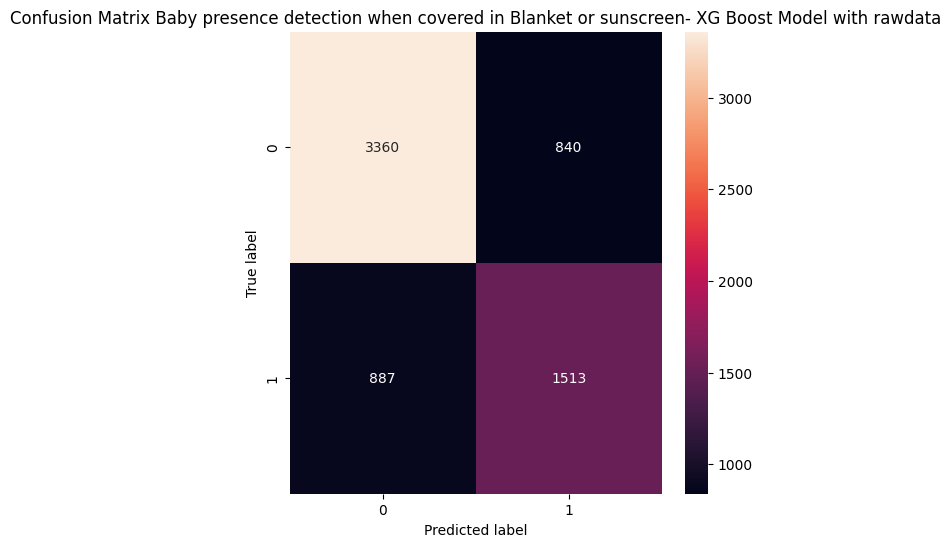

In [79]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen- XG Boost Model with rawdata')
plt.show()

# Training with extracted features

In [82]:
# XG Boost Model with extracted features data

In [85]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Load your dataset (df_combined)
X = dataset_2_withfeatures.drop(columns=['Infant_Presence'])  # Features
y = dataset_2_withfeatures['Infant_Presence']  # Labels

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (XGBoost handles unscaled data well, but scaling can help)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Loss function
    'max_depth': 6,                   # Depth of trees
    'learning_rate': 0.1,              # Step size shrinkage
    'n_estimators': 1000,               # Number of trees
    'random_state': 42
}

# Train XGBoost model
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report for extracted features data:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report for extracted features data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4200
         1.0       1.00      1.00      1.00      2400

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



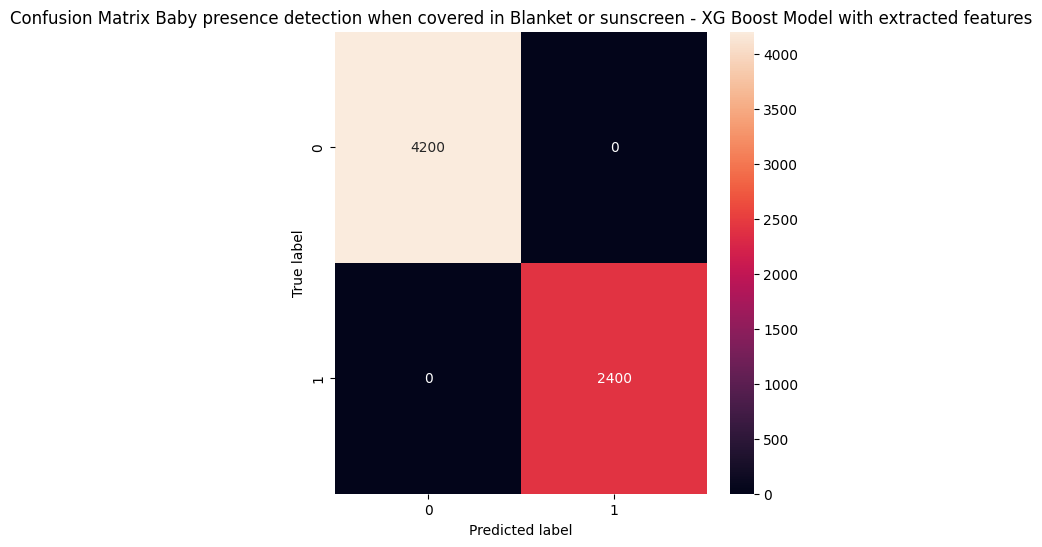

In [89]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen - XG Boost Model with extracted features')
plt.show()

# Feature selection for overcoming OVERFITTING

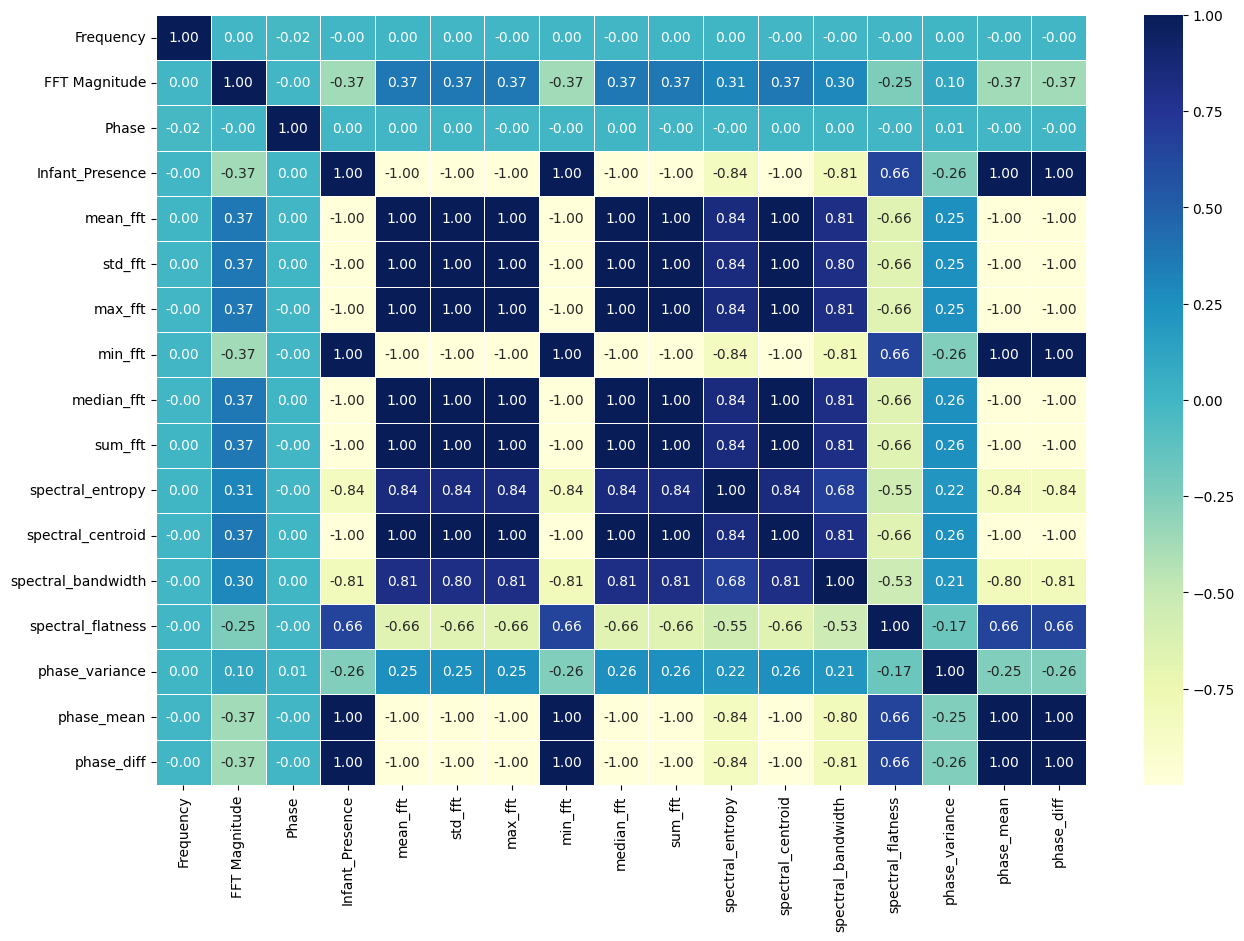

In [92]:
# Plotting correlation matrix for extracted features
corr_matrix = dataset_2_withfeatures.corr()
fig= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')



In [93]:
# Set a threshold for correlation (e.g., 0.8)
threshold = 0.8

# Find pairs of highly correlated features
highly_correlated = np.where(np.abs(corr_matrix) > threshold)

# Create a set to store the columns to drop
to_drop = set()

# Loop through the indices of the highly correlated pairs
for i, j in zip(*highly_correlated):
    if i != j:  # Avoid diagonal (self-correlation)
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        # Ensure we do NOT drop 'Object_Presence'
        if feature_j != "Infant_Presence":
            to_drop.add(feature_j)  # Drop one of the correlated features

# Drop the highly correlated features from the dataframe
dataset_2_reduced = dataset_2_withfeatures.drop(columns=to_drop)

# Display the dropped features and new dataframe shape
print("Dropped features: ", to_drop)
print("New dataframe shape: ", dataset_2_reduced.shape)


Dropped features:  {'median_fft', 'phase_mean', 'spectral_bandwidth', 'min_fft', 'max_fft', 'sum_fft', 'spectral_centroid', 'spectral_entropy', 'mean_fft', 'std_fft', 'phase_diff'}
New dataframe shape:  (33000, 6)


In [94]:
dataset_2_reduced

,Frequency,FFT Magnitude,Phase,Infant_Presence,spectral_flatness,phase_variance
0,0.000000,87853.614686,0.000000,0.0,0.787263,3.207095
1,93.005952,42906.081564,3.087250,0.0,0.815134,3.222629
2,186.011905,3807.554627,-1.950552,0.0,0.792709,3.243818
3,279.017857,3850.745335,1.609702,0.0,0.775582,3.292062
4,372.023810,2781.757042,-1.300276,0.0,0.784922,3.287576
...,...,...,...,...,...,...
32995,-813.802083,708.186621,1.826979,1.0,0.826067,3.252500
32996,-651.041667,788.183052,-0.018248,1.0,0.830652,3.354700
32997,-488.281250,461.454602,-2.500521,1.0,0.799054,3.201027
32998,-325.520833,1213.847030,-2.132477,1.0,0.817447,3.290082


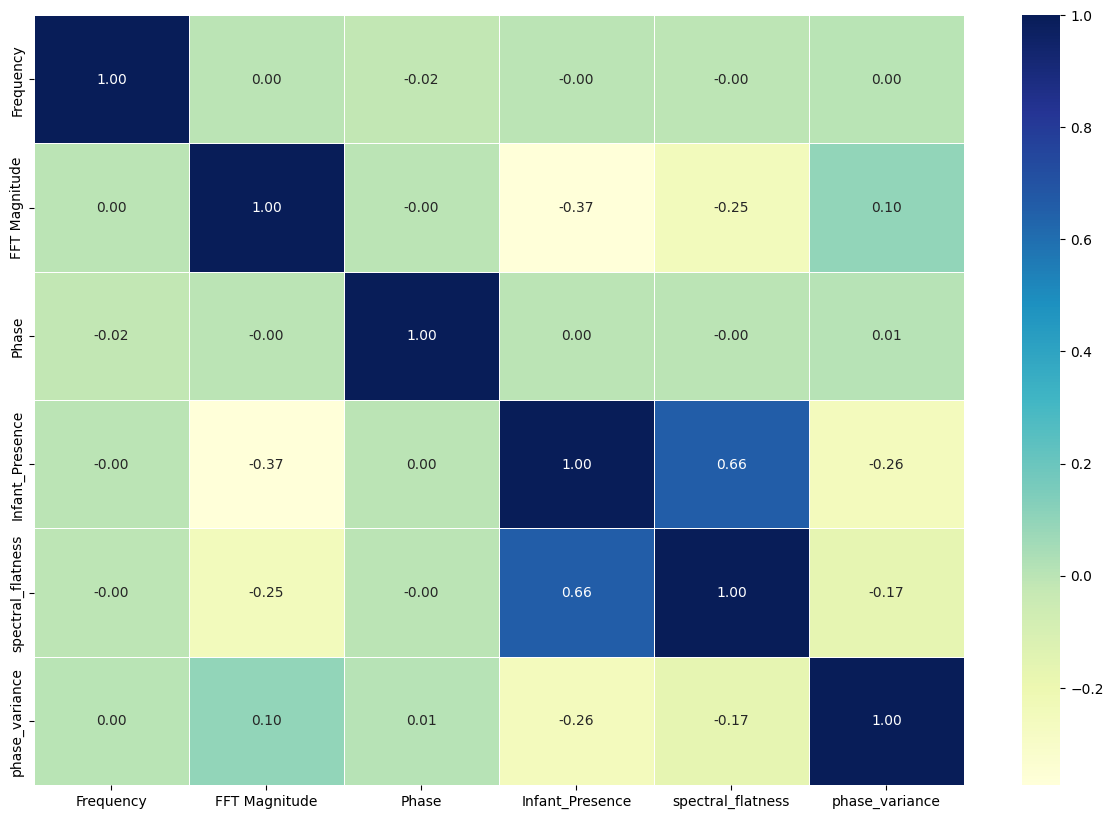

In [95]:
corr_matrix = dataset_2_reduced.corr()
fig= plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')

# XG BOOST with selected features using Correlation matrix

In [101]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (df_combined)
X = dataset_2_reduced.drop(columns=['Infant_Presence'])  # Features
y = dataset_2_reduced['Infant_Presence']  # Labels

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (XGBoost handles unscaled data well, but scaling can help)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss',        # Loss function
    'max_depth': 6,                   # Depth of trees
    'learning_rate': 0.1,              # Step size shrinkage
    'n_estimators': 1000,               # Number of trees
    'random_state': 42
}

# Train XGBoost model
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report for selected features data:\n", classification_report(y_test, y_pred))



Accuracy: 0.8896969696969697

Classification Report for selected features data:
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      4200
         1.0       0.86      0.84      0.85      2400

    accuracy                           0.89      6600
   macro avg       0.88      0.88      0.88      6600
weighted avg       0.89      0.89      0.89      6600



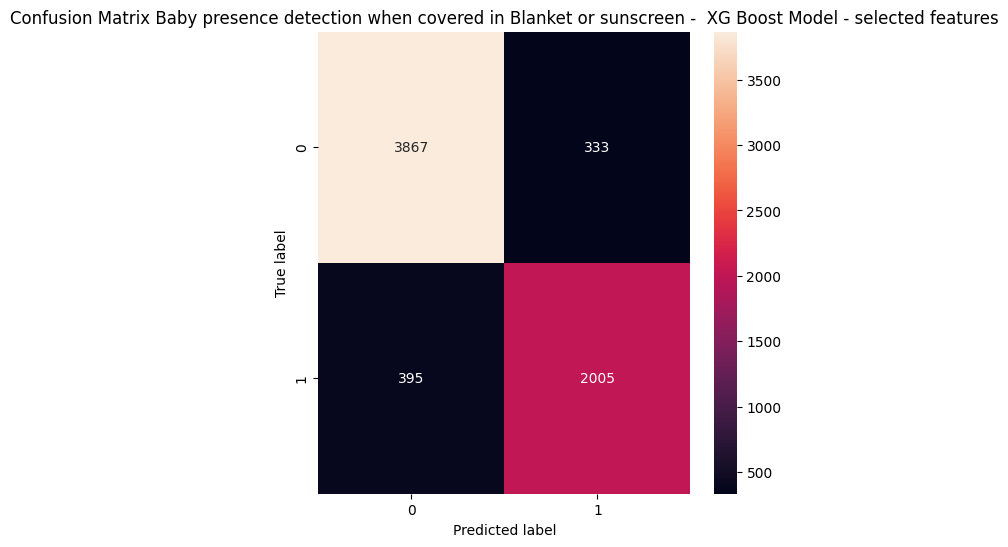

In [102]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen -  XG Boost Model - selected features')
plt.show()

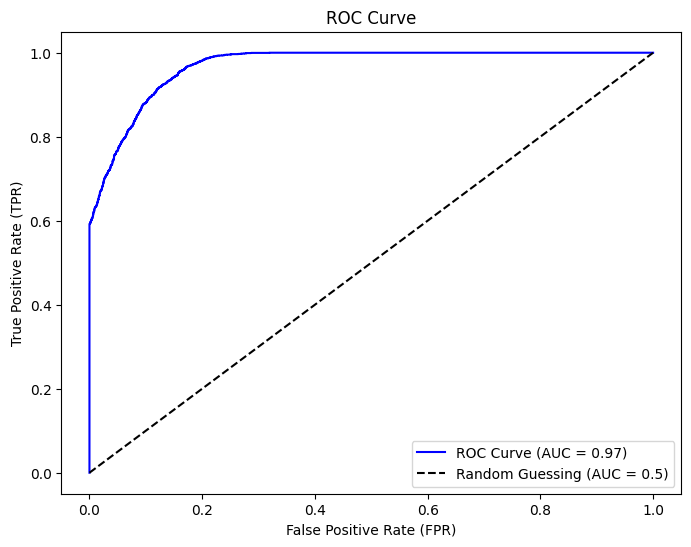

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
auc_score
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


C:\Users\ANUSHRUTH\AppData\Local\Temp\ipykernel_9196\1275781998.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


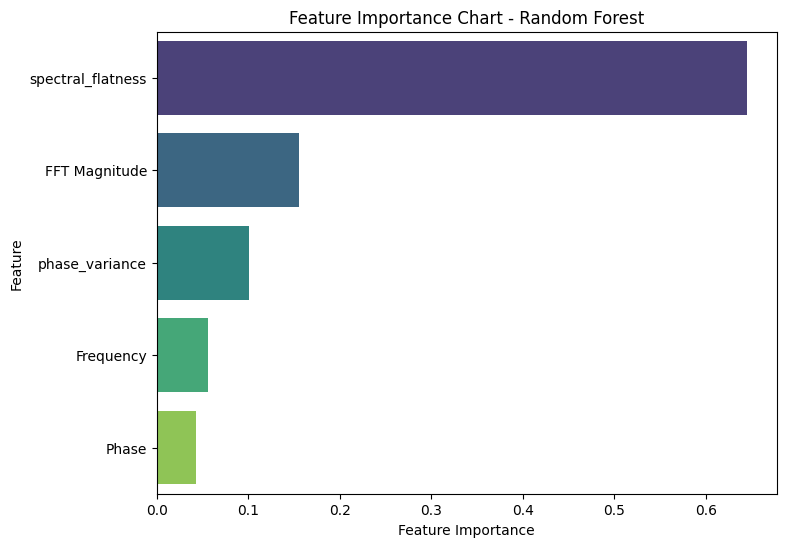

In [107]:
# Feature Importance Plot
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Chart - Random Forest")
plt.show()


In [109]:
import joblib

# Save the trained XGBoost model
clf.save_model('xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json')

# Save the scaler
joblib.dump(scaler, 'xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl')



['xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl']

In [ ]:

import xgboost as xgb

# Load the trained XGBoost model
#clf = xgb.XGBClassifier()
#clf.load_model('xgboost_model_Baby_Covered_in_Blanket_Sunscreen.json')

# Load the scaler
#scaler = joblib.load('xgboost_scaler_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Example: Transform new data and make predictions
#X_new_scaled = scaler.transform(X_new)
#y_pred = clf.predict(X_new_scaled)


# Random Forest Model

In [112]:
# Random Forest Model with raw data

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_2_rawdata.drop('Infant_Presence',axis=1)
Y = dataset_2_rawdata['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for rawdata:", accuracy_score(y_test, y_pred))
print("Classification Report for rawdata:\n", classification_report(y_test, y_pred))

RanFor Accuracy for rawdata: 0.7571212121212121
Classification Report for rawdata:
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      4200
         1.0       0.66      0.69      0.67      2400

    accuracy                           0.76      6600
   macro avg       0.74      0.74      0.74      6600
weighted avg       0.76      0.76      0.76      6600



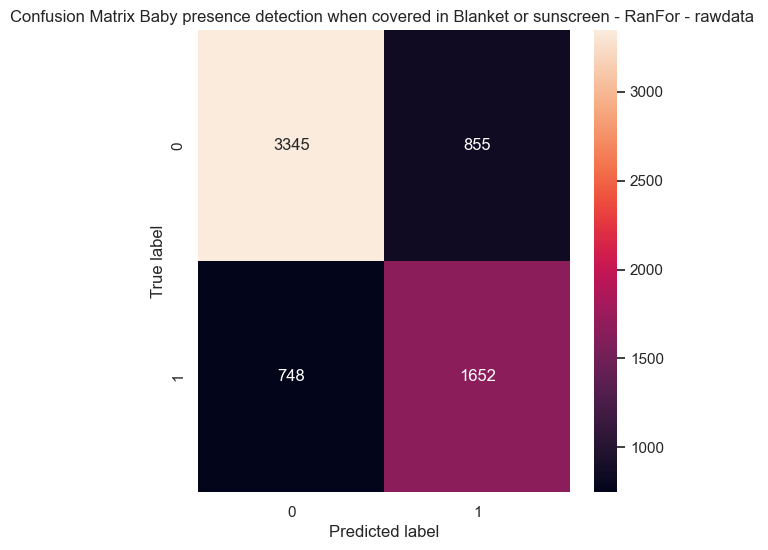

In [115]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen - RanFor - rawdata ')
plt.show()



In [117]:
# Random forest Model with extracted features data

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_2_withfeatures.drop('Infant_Presence',axis=1)
Y = dataset_2_withfeatures['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for extracted features data:", accuracy_score(y_test, y_pred))
print("Classification Report for extracted features data:\n", classification_report(y_test, y_pred))

RanFor Accuracy for extracted features data: 1.0
Classification Report for extracted features data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4200
         1.0       1.00      1.00      1.00      2400

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



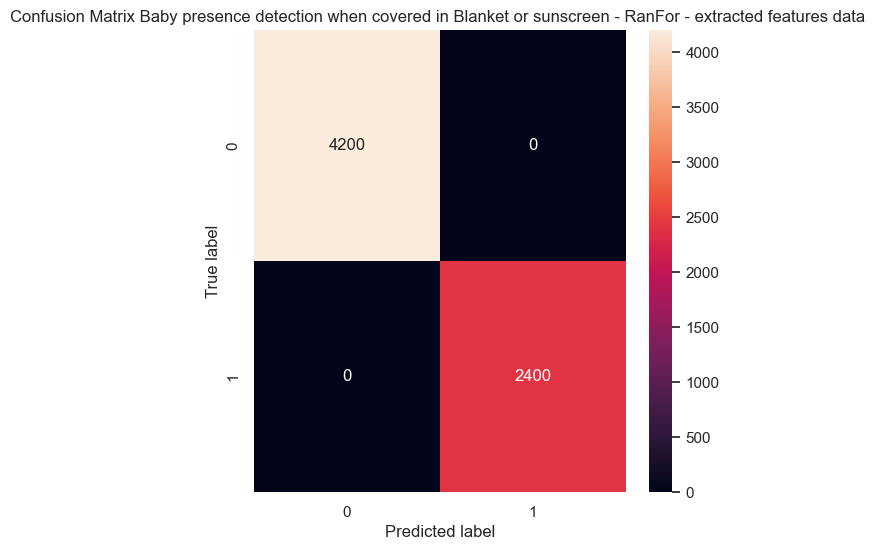

In [119]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen - RanFor - extracted features data ')
plt.show()

In [121]:
# Random forest Model with selected features data

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataset_2_reduced.drop('Infant_Presence',axis=1)
Y = dataset_2_reduced['Infant_Presence']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split = 2, min_samples_leaf = 2, max_features = "sqrt", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("RanFor Accuracy for selected features data:", accuracy_score(y_test, y_pred))
print("Classification Report for selected features data:\n", classification_report(y_test, y_pred))

RanFor Accuracy for selected features data: 0.9065151515151515
Classification Report for selected features data:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      4200
         1.0       0.87      0.88      0.87      2400

    accuracy                           0.91      6600
   macro avg       0.90      0.90      0.90      6600
weighted avg       0.91      0.91      0.91      6600



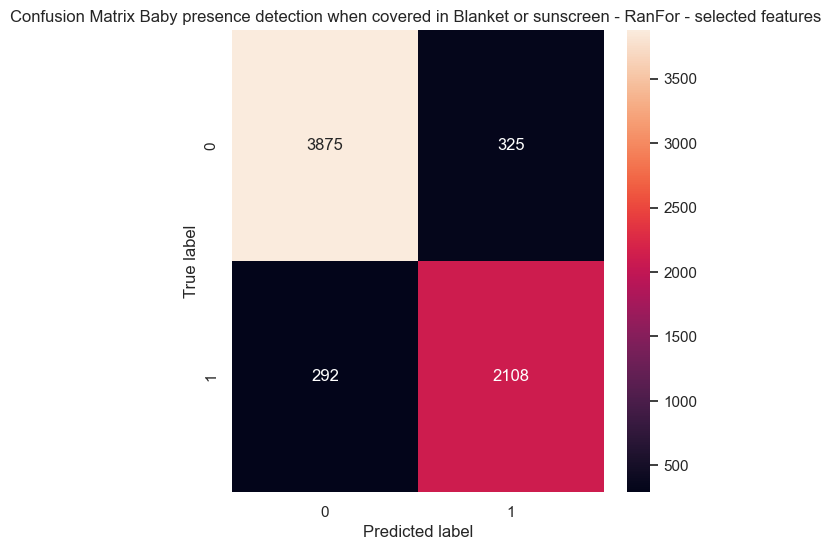

In [123]:
cm =confusion_matrix(y_test,y_pred)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax)  # Use fmt='d' for integer annotation
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('Confusion Matrix Baby presence detection when covered in Blanket or sunscreen - RanFor - selected features ')
plt.show()


C:\Users\ANUSHRUTH\AppData\Local\Temp\ipykernel_9196\1275781998.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


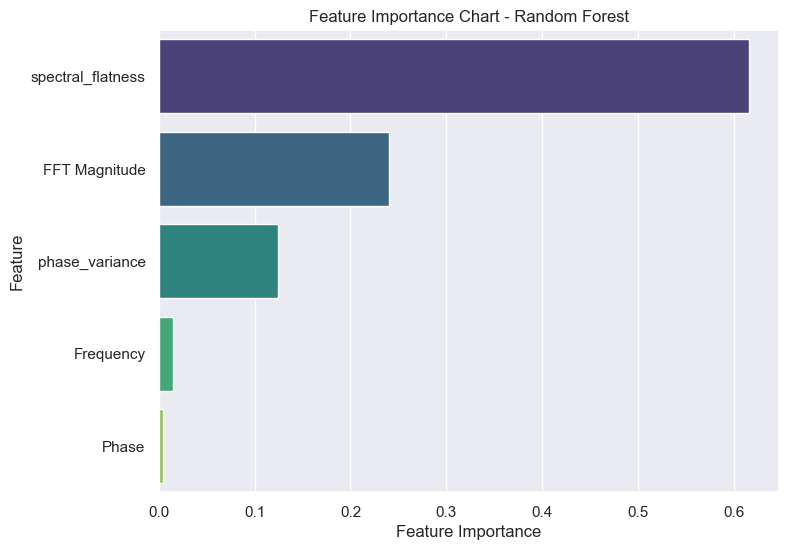

In [124]:
# Feature Importance Plot
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Chart - Random Forest")
plt.show()


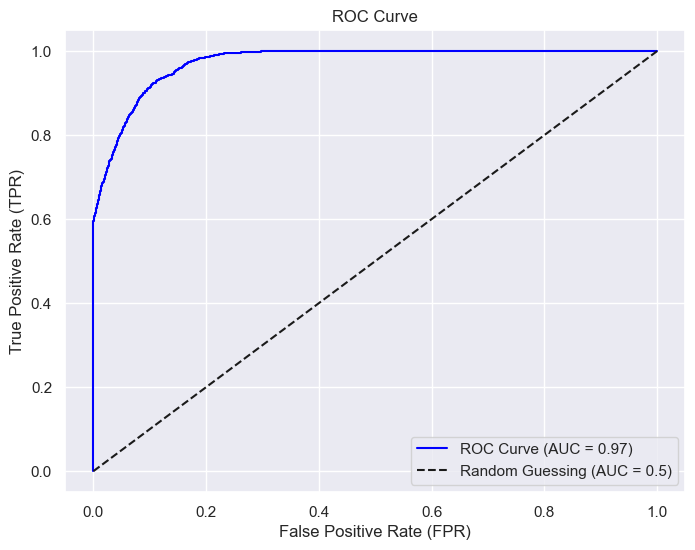

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)
auc_score
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [126]:
import joblib

# Save the model
joblib.dump(clf, 'random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Load the model (for later use)
#loaded_model = joblib.load('random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl')

# Make predictions with the loaded model
#y_pred_loaded = loaded_model.predict(X_test)


['random_forest_model_Baby_Covered_in_Blanket_Sunscreen.pkl']